# 2 Pretrained networks
This chapter covers
* Running pretrained image-recognition models
* An introduction to GANs and CycleGAN
* Captioning models that can produce text descriptions of images
* Sharing models through Torch Hub

In this chapter, we will explore three popular pretrained models: a model that can label an image according to its content, another that can fabricate a new image from a real image, and a model that can describe the content of an image using proper
English sentences. We will learn how to load and run these pretrained models in PyTorch, and we will introduce PyTorch Hub, a set of tools through which PyTorch models like the pretrained ones we’ll discuss can be easily made available through a uniform interface. Along the way, we’ll discuss data sources, define terminology like label, and attend a zebra rodeo.

## 2.1 A pretrained network that recognizes the subject of an image
As our first foray into deep learning, we’ll run a state-of-the-art deep neural network that was pretrained on an object recognition task. There are many pretrained networks that can be accessed through source code repositories. It is common for
researchers to publish their source code along with their papers, and often the code comes with weights that were obtained by training a model on a reference dataset. Using one of these models could enable us to, for example, equip our next web service
with image-recognition capabilities with very little effort.

The pretrained network we’ll explore here was trained on a subset of [the ImageNet dataset](http://imagenet.stanford.edu). ImageNet is a very large dataset of over 14 million images maintained by Stanford University. All of the images are labeled with a hierarchy of nouns that come from [the WordNet dataset](http://wordnet.princeton.edu), which is in turn a large lexical database of the English language.

![](images/2.1.PNG)

We are going to end up being able to take our own images and feed them into our pretrained model, as pictured in figure 2.2. This will result in a list of predicted labels for that image, which we can then examine to see what the model thinks our image is. Some images will have predictions that are accurate, and others will not!

## 2.1.1 Obtaining a pretrained network for image recognition
As discussed, we will now equip ourselves with a network trained on ImageNet. To do so, we’ll take a look at the [TorchVision project](https://github.com/pytorch/vision), which contains a few of the best-performing neural network architectures for computer vision, such as [AlexNet](http://mng.bz/lo6z), [ResNet](https://arxiv.org/pdf/1512.03385.pdf), and [Inception v3](https://arxiv.org/pdf/1512.00567.pdf). It also has easy access to datasets like ImageNet and other utilities for getting up to speed with computer vision applications in PyTorch. We’ll dive into some of these further along in the book. For now, let’s load up and run two networks: first **AlexNet**, one of the early breakthrough networks for image recognition; and then a residual network, **ResNet** for short, which won the **ImageNet classification**, **detection**, and **localization** competitions, among others, in 2015. If you didn’t get PyTorch up and running in chapter 1, now is a good time to do that.

In [1]:
# In[1]:
from torchvision import models

We can take a look at the actual models:

In [2]:
# In[2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

The lowercase names are convenience functions that return models instantiated from those classes, sometimes with different
parameter sets. For instance, `resnet101` returns an instance of ResNet with 101 layers, `resnet18` has 18 layers, and so on. We’ll now turn our attention to AlexNet.

### 2.1.2 AlexNet
The AlexNet architecture won the 2012 ILSVRC by a large margin, with a top-5 test error rate (that is, the correct label must be in the top 5 predictions) of 15.4%. By comparison, the second-best submission, which wasn’t based on a deep network,
trailed at 26.2%. This was a defining moment in the history of computer vision: the moment when the community started to realize the potential of deep learning for vision tasks. That leap was followed by constant improvement, with more modern architectures and training methods getting top-5 error rates as low as 3%.

We can see the structure of AlexNet in figure 2.3. Not that we have all the elements for understanding it now, but we can anticipate a few aspects. First, each block consists of a bunch of multiplications and additions, plus a sprinkle of other functions in the output that we’ll discover in chapter 5. We can think of it as a filter—a function that
takes one or more images as input and produces other images as output. The way it does so is determined during training, based on the examples it has seen and on the desired outputs for those.

![](images/2.2.PNG)

In figure 2.3, input images come in from the left and go through five stacks of filters, each producing a number of output images. After each filter, the images are reduced in size, as annotated. The images produced by the last stack of filters are laid out as a 4,096-element 1D vector and classified to produce 1,000 output probabilities, one for each output class.

In [3]:
#In[3]:
alexnet = models.AlexNet()

At this point, `alexnet` is an object that can run the AlexNet architecture. It’s not essential for us to understand the details of this architecture for now. For the time being, `AlexNet` is just an opaque object that can be called like a function. By providing `alexnet` with some precisely sized input data (we’ll see shortly what this input data should be), we will run a *forward pass* through the network. That is, the input will run through the first set of neurons, whose outputs will be fed to the next set of neurons, all the way to the final output. Practically speaking, assuming we have an input object of the right type, we can run the forward pass with `output = alexnet(input)`.

### 2.1.3 ResNet
Using the `resnet101` function, we’ll now instantiate a 101-layer convolutional neural network. Just to put things in perspective, before the advent of residual networks in 2015, achieving stable training at such depths was considered extremely hard. Residual networks pulled a trick that made it possible, and by doing so, beat several benchmarks in one sweep that year.

In [4]:
# In[4]:
resnet = models.resnet101(pretrained=True)

While we’re staring at the download progress, we can take a minute to appreciate that `resnet101` sports 44.5 million parameters—that’s a lot of parameters to optimize automatically!

### 2.1.4 Ready, set, almost run
For now, this will be information overload, but as we progress through the book, we’ll increase our ability to understand what this code is telling us:

In [5]:
# In[5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

If we scroll down, we’ll see a lot of `Bottleneck` modules repeating one after the other (101 of them!), containing convolutions and other modules. That’s the anatomy of a typical deep neural network for computer vision: a more or less sequential cascade of filters and nonlinear functions, ending with a layer (`fc`) producing scores for each of the 1,000 output classes (`out_features`).

The `resnet` variable can be called like a function, taking as input one or more images and producing an equal number of scores for each of the 1,000 ImageNet classes. Before we can do that, however, we have to preprocess the input images so they are the right size and so that their values (colors) sit roughly in the same numerical range. In order to do that, the `torchvision` module provides `transforms`, which allow us to quickly define pipelines of basic preprocessing functions:

In [6]:
# In[6]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

In this case, we defined a preprocess function that will scale the input image to $256 × 256$, crop the image to $224 × 224$ around the center, transform it to a tensor (aPyTorch multidimensional array: in this case, a 3D array with color, height, and width), and normalize its RGB (red, green, blue) components so that they have defined means and standard deviations. These need to match what was presented to the network during training, if we want the network to produce meaningful answers. We’ll go into more depth about transforms when we dive into making our own imagerecognition models in section 7.1.3.

In [7]:
# In[7]:
from PIL import Image
img = Image.open("./data/p1ch2/dog.jpg")

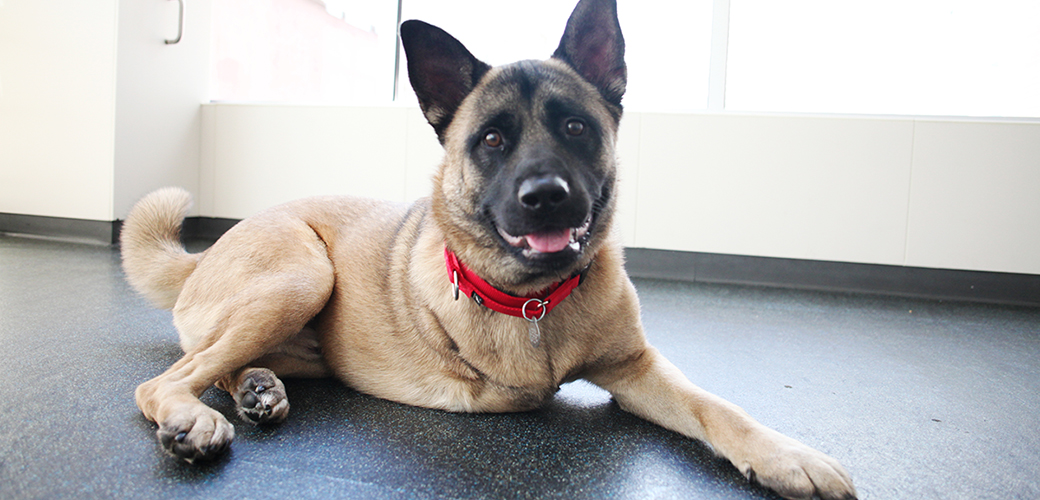

In [8]:
# In[8]:
img

Next, we can pass the image through our preprocessing pipeline:

In [9]:
# In[9]:
img_t = preprocess(img)

Then we can reshape, crop, and normalize the input tensor in a way that the network expects. We’ll understand more of this in the next two chapters; hold tight for now:

In [10]:
# In[10]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

### 2.1.5 Run!
The process of running a trained model on new data is called *inference* in deep learning circles. In order to do inference, we need to put the network in eval mode:

In [11]:
# In[11]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

If we forget to do that, some pretrained models, like **batch normalization** and **dropout**, will not produce meaningful answers, just because of the way they work internally. Now that eval has been set, we’re ready for inference:

In [12]:
# In[12]:
out = resnet(batch_t)
out

tensor([[ 1.0954e+00, -1.3276e+00,  1.4038e+00, -1.3362e+00, -1.3681e+00,
         -2.2042e+00, -3.9113e+00, -2.1688e+00, -5.5284e-01, -5.7957e+00,
         -3.2426e+00, -4.4639e+00, -2.2979e+00, -3.6083e+00, -3.6384e+00,
         -2.7583e+00,  2.2609e+00,  1.7299e+00, -1.2108e+00, -1.9823e+00,
         -4.3918e+00, -5.0460e+00, -6.0832e+00, -3.0787e+00, -3.5685e+00,
         -2.2482e+00, -4.7354e+00, -2.9989e+00, -2.1119e+00, -3.1406e+00,
         -4.7821e-01, -4.5254e+00, -3.3284e+00, -2.0721e+00, -1.1665e+00,
         -1.8520e+00, -2.1826e+00, -2.1866e+00, -3.8544e+00, -2.1925e-01,
         -2.6355e+00, -3.2325e+00, -1.3163e+00, -1.1121e+00, -1.4794e+00,
          6.0782e-01, -1.7724e+00, -7.9766e-01, -2.6875e+00, -3.8740e+00,
         -2.2801e+00,  6.8499e-01, -1.8343e+00, -2.3781e+00, -1.5768e-01,
         -1.1979e+00, -3.3183e+00, -1.9414e+00, -2.3660e+00, -2.5585e+00,
         -1.7584e+00, -1.8895e+00, -2.2139e+00, -2.0697e+00, -9.4608e-01,
         -1.4013e+00, -9.2253e-01, -1.

Let’s load the file containing the 1,000 labels for the ImageNet dataset classes:

In [13]:
# In[13]:
with open('./data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

At this point, we need to determine the index corresponding to the maximum score in the `out` tensor we obtained previously. We can do that using the `max` function in PyTorch, which outputs the maximum value in a tensor as well as the indices where that maximum value occurred:

In [14]:
# In[14]:
_, index = torch.max(out, 1)

We can now use the `index` to access the label. Here, index is not a plain Python number, but a one-element, one-dimensional tensor (specifically, `tensor([207])`), so we need to get the actual numerical value to use as an index into our `labels` list using `index[0]`. We also use `torch.nn.functional.softmax` to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something roughly akin to the confidence that the model has in its prediction. In this case, the model is 96% certain that it knows what it’s looking at is a golden retriever:

In [15]:
# In[15]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('malinois', 73.12525177001953)

In [16]:
# In[16]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('malinois', 73.12525177001953),
 ('Norwegian elkhound, elkhound', 26.50225067138672),
 ('German shepherd, German shepherd dog, German police dog, alsatian',
  0.18164578080177307),
 ('pug, pug-dog', 0.04439588636159897),
 ('Siamese cat, Siamese', 0.020828502252697945)]

We see that the first four are dogs (redbone is a breed; who knew?), after which things start to get funny. The fifth answer, “tennis ball,” is probably because there are enough pictures of tennis balls with dogs nearby that the model is essentially saying, “There’s a 0.1% chance that I’ve completely misunderstood what a tennis ball is.” This is a great example of the fundamental differences in how humans and neural networks view the world, as well as how easy it is for strange, subtle biases to sneak into our data.

## 2.2 A pretrained model that fakes it until it makes it
### 2.2.1 The GAN game
In the context of deep learning, what we’ve just described is known as **the GAN game**, where two networks, one acting as the painter and the other as the art historian, compete to outsmart each other at creating and detecting forgeries. GAN stands for *generative adversarial network*, where *generative* means something is being created (in this case, fake masterpieces), *adversarial* means the two networks are competing to outsmart the other, and well, *network* is pretty obvious. These networks are one of the most original outcomes of recent deep learning research.

The *generator* network takes the role of the painter in our scenario, tasked with producing realistic-looking images, starting from an arbitrary input. The *discriminator* network is the amoral art inspector, needing to tell whether a given image was fabricated by the generator or belongs in a set of real images. This two-network design is atypical for most deep learning architectures but, when used to implement a GAN game, can lead to incredible results.

Figure 2.5 shows a rough picture of what’s going on. The end goal for the generator is to fool the discriminator into mixing up real and fake images. The end goal for the discriminator is to find out when it’s being tricked, but it also helps inform the generator about the identifiable mistakes in the generated images. At the start, the generator produces confused, three-eyed monsters that look nothing like a Rembrandt portrait. The discriminator is easily able to distinguish the muddled messes from the real paintings. As training progresses, information flows back from the discriminator, and the generator uses it to improve. By the end of training, the generator is able to produce convincing fakes, and the discriminator no longer is able to tell which is which.

<img src="images/2.3.png" width="800"/>

### 2.2.2 CycleGAN
An interesting evolution of this concept is the CycleGAN. A CycleGAN can turn images of one domain into images of another domain (and back), without the need for us to explicitly provide matching pairs in the training set.

In figure 2.6, we have a CycleGAN workflow for the task of turning a photo of a horse into a zebra, and vice versa. Note that there are two separate generator networks, as well as two distinct discriminators.

<img src="images/2.4.png" width=800/>

As the figure shows, the first generator learns to produce an image conforming to a target distribution (zebras, in this case) starting from an image belonging to a different distribution (horses), so that the discriminator can’t tell if the image produced from a horse photo is actually a genuine picture of a zebra or not. At the same time—and here’s where the Cycle prefix in the acronym comes in—the resulting fake zebra is sent through a different generator going the other way (zebra to horse, in our case), to be judged by another discriminator on the other side. Creating such a cycle stabilizes the training process considerably, which addresses one of the original issues with GANs.

### 2.2.3 A network that turns horses into zebras
We can play with this model right now. The CycleGAN network has been trained on a dataset of (unrelated) horse images and zebra images extracted from the ImageNet dataset. The network learns to take an image of one or more horses and turn them all into zebras, leaving the rest of the image as unmodified as possible. While humankind hasn’t held its breath over the last few thousand years for a tool that turn horses into zebras, this task showcases the ability of these architectures to model complex realworld processes with distant supervision. While they have their limits, there are hints that in the near future we won’t be able to tell real from fake in a live video feed, which opens a can of worms that we’ll duly close right now.

Playing with a pretrained CycleGAN will give us the opportunity to take a step closer and look at how a network—a generator, in this case—is implemented. We’ll use our old friend ResNet. We’ll define a `ResNetGenerator` class offscreen. The code is in the first cell of the 3_cyclegan.ipynb file, but the implementation isn’t relevant right now, and it’s too complex to follow until we’ve gotten a lot more PyTorch experience. Right now, we’re focused on what it can do, rather than how it does it.

In [21]:
from cyclegan import ResNetBlock, ResNetGenerator

In [22]:
# In[2]:
netG = ResNetGenerator()

The `netG` model has been created, but it contains random weights. We mentioned earlier that we would run a generator model that had been pretrained on the horse2zebra dataset, whose training set contains two sets of 1068 and 1335 images of horses and zebras, respectively.

In [23]:
# In[3]:
model_path = './data/p1ch2/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

At this point, `netG` has acquired all the knowledge it achieved during training. Note that this is fully equivalent to what happened when we loaded `resnet101` from `torchvision` in section 2.1.3; but the `torchvision.resnet101` function hid the loading from us.

In [24]:
# In[4]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

We’re ready to load a random image of a horse and see what our generator produces. First, we need to import `PIL` and `torchvision`:

In [25]:
# In[5]:
from PIL import Image
from torchvision import transforms

Then we define a few input transformations to make sure data enters the network with the right shape and size:

In [26]:
# In[6]:
preprocess = transforms.Compose([transforms.Resize(256),
transforms.ToTensor()])

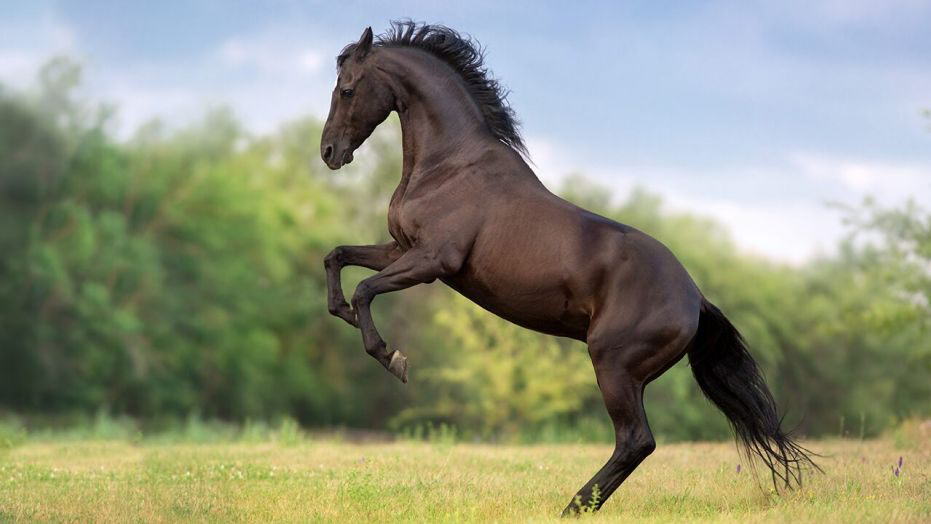

In [27]:
# In[7]:
img = Image.open("./data/p1ch2/horse_2.jpg")
img

OK, there’s a dude on the horse. (Not for long, judging by the picture.) Anyhow, let’s pass it through preprocessing and turn it into a properly shaped variable:

In [28]:
# In[8]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

We shouldn’t worry about the details right now. The important thing is that we follow from a distance. At this point, batch_t can be sent to our model:

In [29]:
# In[9]:
batch_out = netG(batch_t)

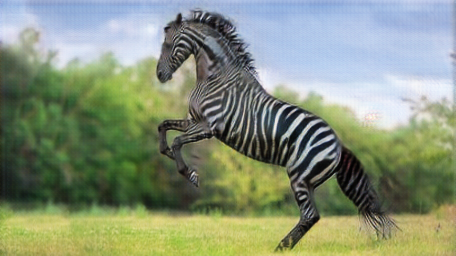

In [30]:
# In[10]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

Many other fun generators have been developed using adversarial training or other approaches. Some of them are capable of creating credible human faces of nonexistent individuals; others can translate sketches into real-looking pictures of imaginary landscapes. Generative models are also being explored for producing real-sounding audio, credible text, and enjoyable music. It is likely that these models will be the basis of future tools that support the creative process.

## 2.3 A pretrained network that describes scenes
In order to get firsthand experience with a model involving natural language, we will use a pretrained image-captioning model, generously provided by Ruotian Luo.2 It is an implementation of **the NeuralTalk2** model by Andrej Karpathy. When presented with a natural image, this kind of model generates a caption in English that describes the scene, as shown in figure 2.9. The model is trained on a large dataset of images along with a paired sentence description: for example, “A Tabby cat is leaning on a wooden table, with one paw on a laser mouse and the other on a black laptop.”

<img src="images/2.5.png" width=800/>

This captioning model has two connected halves. The first half of the model is a network that learns to generate “descriptive” numerical representations of the scene (Tabby cat, laser mouse, paw), which are then taken as input to the second half. That second half is a *recurrent neural network* that generates a coherent sentence by putting those numerical descriptions together. The two halves of the model are trained together on image-caption pairs.

The second half of the model is called *recurrent* because it generates its outputs (individual words) in subsequent forward passes, where the input to each forward pass includes the outputs of the previous forward pass. This generates a dependency of the next word on words that were generated earlier, as we would expect when dealing with sentences or, in general, with sequences.

### 2.3.1 NeuralTalk2
[The NeuralTalk2 model](https://github.com/deep-learning-withpytorch/ImageCaptioning.pytorch). We can place a set of images in the data directory and run the following script:

`python eval.py --model ./data/FC/fc-model.pth`

➥ `--infos_path ./data/FC/fc-infos.pkl --image_folder ./data`

Let’s try it with our horse.jpg image. It says, “A person riding a horse on a beach.”
Quite appropriate.

## 2.4 Torch Hub
Pretrained models have been published since the early days of deep learning, but until PyTorch 1.0, there was no way to ensure that users would have a uniform interface to get them. TorchVision was a good example of a clean interface, as we saw earlier
in this chapter; but other authors, as we have seen for CycleGAN and NeuralTalk2, chose different designs.

In the case of TorchVision, there are two: `resnet18` and `resnet50`. We already know what these do: they return an 18-layer and a 50-layer ResNet model, respectively. We also see that the entry-point functions include a *pretrained* keyword argument. If `True`, the returned models will be initialized with weights learned from ImageNet, as we saw earlier in the chapter.

Now we know the repo, the entry points, and one interesting keyword argument. That’s about all we need to load the model using torch.hub, without even cloning the repo. That’s right, PyTorch will handle that for us:

In [31]:
import torch
from torch import hub
resnet18_model = hub.load('pytorch/vision:master', # Name and branch of the GitHub repo
        'resnet18', # Name of the entrypoint function
        pretrained=True) # Keyword argument

Downloading: "https://github.com/pytorch/vision/archive/master.zip" to C:\Users\ADMIN/.cache\torch\hub\master.zip
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\ADMIN/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


This manages to download a snapshot of the master branch of the pytorch/vision repo, along with the weights, to a local directory (defaults to .torch/hub in our home directory) and run the `resnet18` entry-point function, which returns the instantiated model. Depending on the environment, Python may complain that there’s a module missing, like `PIL`. Torch Hub won’t install missing dependencies, but it will report them to us so that we can take action.

Torch Hub is quite new at the time of writing, and there are only a few models published this way. We can get at them by Googling “github.com hubconf.py.” Hopefully the list will grow in the future, as more authors share their models through this channel.

## 2.5 Conclusion
We hope this was a fun chapter. We took some time to play with models created with PyTorch, which were optimized to carry out specific tasks. In fact, the more enterprising of us could already put one of these models behind a web server and start a business, sharing the profits with the original authors!4 Once we learn how these models are built, we will also be able to use the knowledge we gained here to download a pretrained model and quickly fine-tune it on a slightly different task.

This book does not focus on going through the complete PyTorch API or reviewing deep learning architectures; rather, we will build hands-on knowledge of these building blocks. This way, you will be able to consume the excellent online documentation and repositories on top of a solid foundation.

## 2.6 Exercises
1. Feed the image of the golden retriever into the horse-to-zebra model.
    * What do you need to do to the image to prepare it?
    * What does the output look like?
2. Search GitHub for projects that provide a hubconf.py file.
    * How many repositories are returned?
    * Find an interesting-looking project with a hubconf.py. Can you understand the purpose of the project from the documentation?
    * Bookmark the project, and come back after you’ve finished this book. Can you understand the implementation?

## 2.7 Summary
* A pretrained network is a model that has already been trained on a dataset. Such networks can typically produce useful results immediately after loading the network parameters.
* By knowing how to use a pretrained model, we can integrate a neural network into a project without having to design or train it.
* AlexNet and ResNet are two deep convolutional networks that set new benchmarks for image recognition in the years they were released.
* Generative adversarial networks (GANs) have two parts—the generator and the discriminator—that work together to produce output indistinguishable from authentic items.
* CycleGAN uses an architecture that supports converting back and forth between two different classes of images.
* NeuralTalk2 uses a hybrid model architecture to consume an image and produce a text description of the image.
* Torch Hub is a standardized way to load models and weights from any project with an appropriate hubconf.py file.